### 1

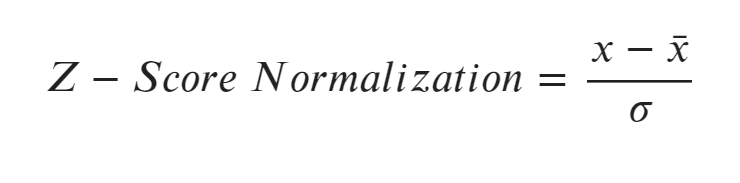

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import csv 

In [3]:
df = pd.read_csv('/content/abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
import csv 

with open('/content/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)

    rows = []
    for row in csvreader:
        rows.append(row)

In [6]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [7]:
input_cnt  = 10
output_cnt = 1

data = np.zeros([len(rows), input_cnt + output_cnt])
print(data.shape)

(4177, 11)


In [8]:
for n,row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1
    data[n,3 :] = row[1:]

In [9]:
data[:5]

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ]])

In [10]:
train_ratio = 0.8


In [11]:
test_begin_index = int(data.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3341


In [12]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map[:5])

[2790 2913 1886 2326 3816]


In [13]:
train_data = data[shuffle_map[:test_begin_index]]
print(train_data.shape)

(3341, 11)


In [14]:
test_data = data[shuffle_map[test_begin_index:]]
print(test_data.shape)

(836, 11)


In [15]:
train_X, train_Y = train_data[:,:-output_cnt], train_data[:,-output_cnt : ]
test_X, test_Y   = test_data[:,:-output_cnt], test_data[:,-output_cnt : ]

In [16]:
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(3341, 10)
(3341, 1)
(836, 10)
(836, 1)


### 2

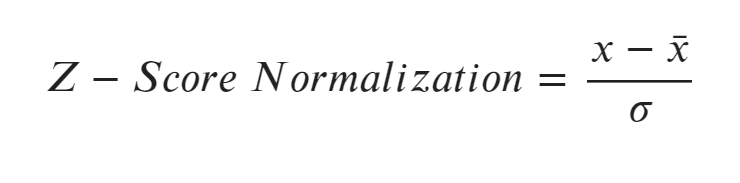

In [29]:
train_X_mean = np.mean(train_X, axis = 0)
print(train_X_mean)

[0.36456151 0.31457647 0.32086202 0.5248683  0.40860521 0.14005088
 0.83219006 0.36084511 0.18126519 0.23976758]


In [30]:
train_X_std = train_X.std(axis = 0) # Y축으로
print(train_X_std)

[0.48130699 0.46434698 0.46680787 0.1197483  0.09872686 0.04260976
 0.4892248  0.2215458  0.10910792 0.13905264]


In [31]:
train_X -= train_X_mean
train_X /= train_X_std

In [32]:
# test 데이터 에 대한 정규화

test_X -= train_X_mean
test_X /= train_X_std

신경망 쌓기

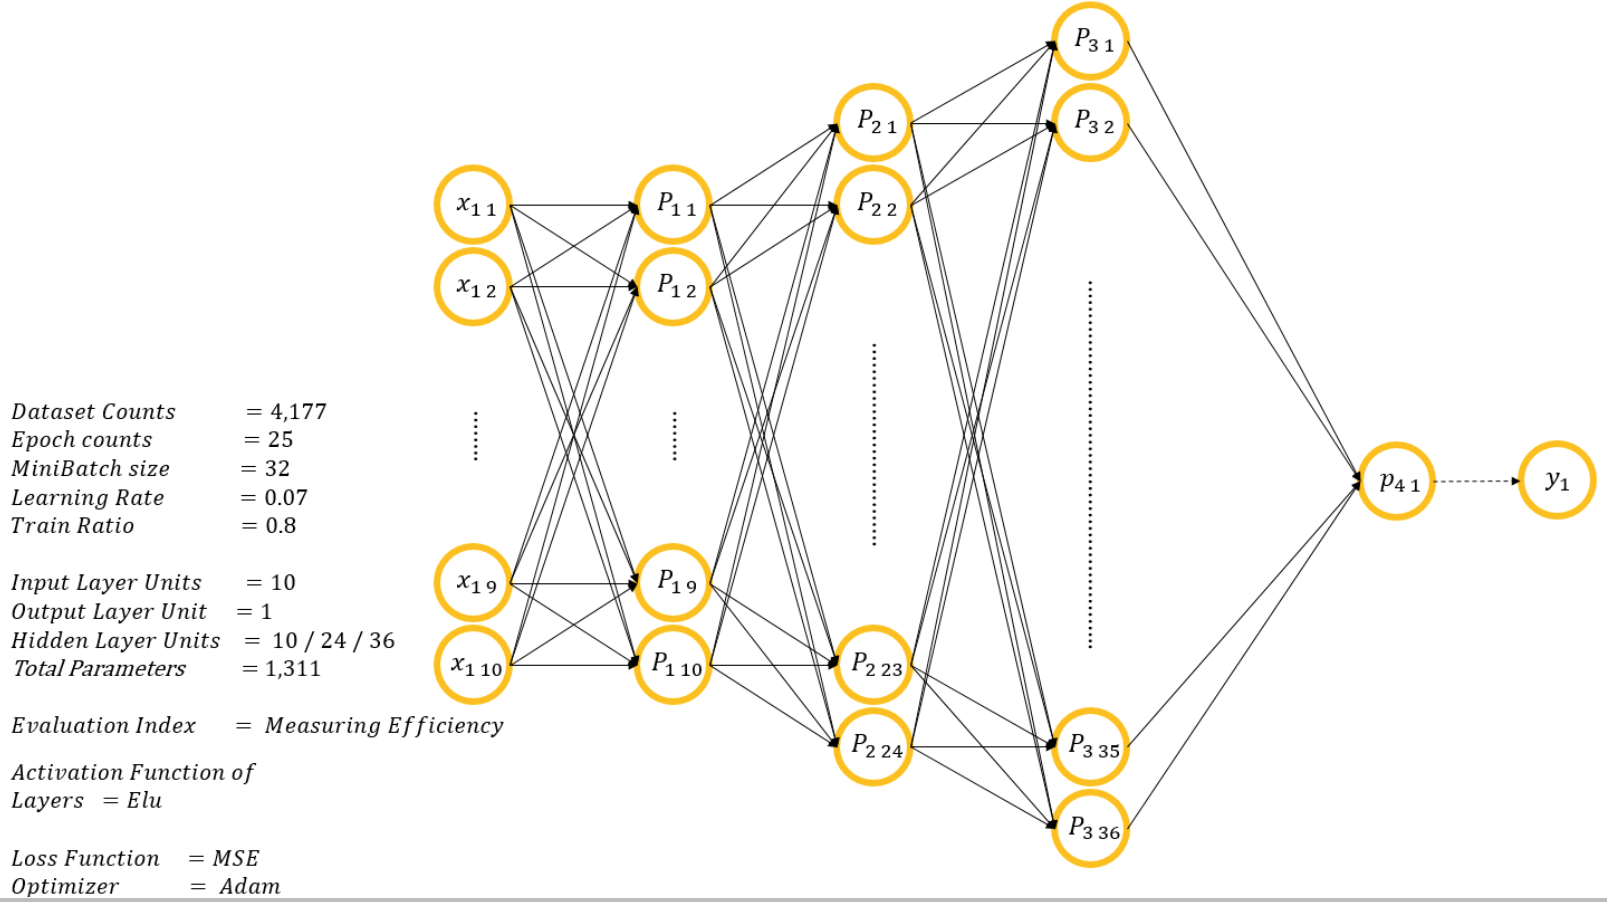

In [49]:
GJ_NET_MODEL_V1 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units=10,
                                                             input_shape = (10, ),
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units=24,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units=36,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units=1)
])

In [26]:
GJ_NET_MODEL_V1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [51]:
GJ_NET_MODEL_V1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse')

In [57]:
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y, epochs = 25, batch_size=32,
                                validation_split = 0.2)

Epoch 1/25
84/84 [==============================] - 0s 2ms/step - loss: 11.4991 - val_loss: 9.7818
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 11.1231 - val_loss: 10.4526
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: 11.0693 - val_loss: 9.8802
Epoch 4/25
84/84 [==============================] - 0s 2ms/step - loss: 10.8857 - val_loss: 10.1578
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: 11.1161 - val_loss: 9.7863
Epoch 6/25
84/84 [==============================] - 0s 3ms/step - loss: 10.9464 - val_loss: 9.7419
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: 10.7818 - val_loss: 9.7838
Epoch 8/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9340 - val_loss: 10.2664
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: 11.0239 - val_loss: 9.8402
Epoch 10/25
84/84 [==============================] - 0s 2ms/step - loss: 10.9898 - val_loss: 10.2229
Epoch

In [38]:
GJ_NET_MODEL_V1.evaluate(test_X,test_Y)

27/27 [==============================] - 0s 1ms/step - loss: 10.3287


10.328746795654297

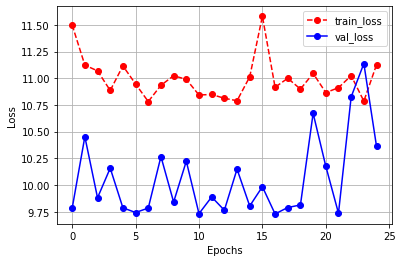

In [58]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'train_loss')
plt.plot(history_1.history['val_loss'], '-o', color = 'blue', label = 'val_loss')

plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [54]:
pred_Y = GJ_NET_MODEL_V1.predict(test_X)
print(pred_Y[:10])

[[9.119907]
 [9.119907]
 [9.119907]
 [9.119907]
 [9.119907]
 [9.119907]
 [9.119907]
 [9.119907]
 [9.119907]
 [9.119907]]


In [55]:
test_Y[:10]

array([[ 6.],
       [14.],
       [ 7.],
       [10.],
       [14.],
       [18.],
       [ 8.],
       [13.],
       [10.],
       [10.]])

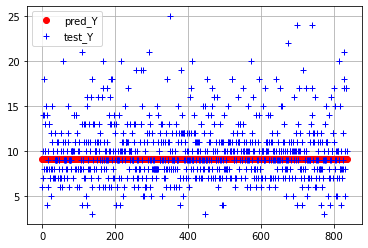

In [59]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'test_Y')

plt.legend()
plt.grid()

plt.show()

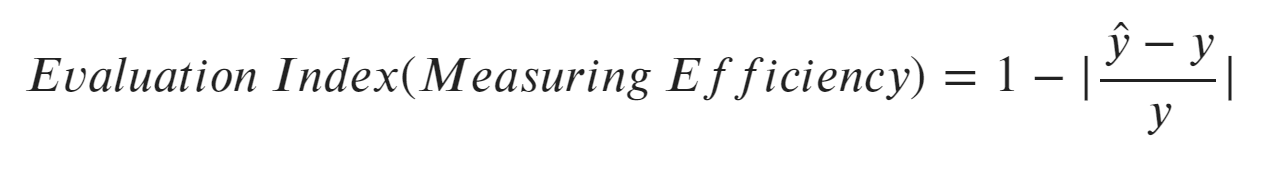

In [60]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))

print("GJ_NET_MODEL_V1 - ACC : {} %".format(np.round(acc * 100,3)))

GJ_NET_MODEL_V1 - ACC : 76.475 %


### 3

신경망을 보다 단순하게 쌓아서 다시 결과 확인

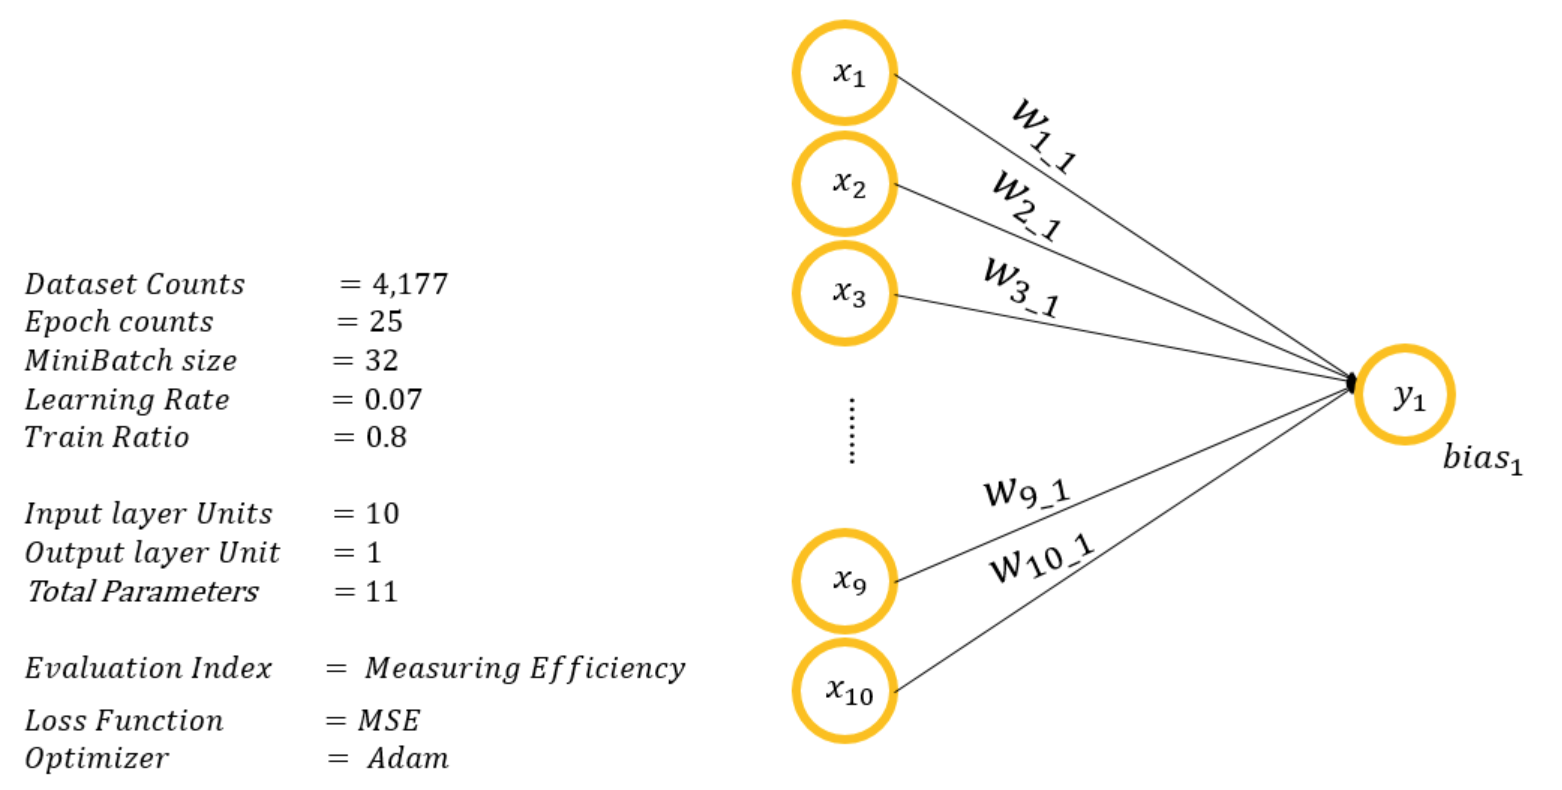

In [35]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units=1,
                                                             input_shape = (10,))
])

In [36]:
GJ_NET_MODEL_V2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [37]:
GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse')

In [38]:
history_2 = GJ_NET_MODEL_V2.fit(train_X,train_Y,epochs = 200, batch_size = 32,
                                validation_split = 0.2,
                                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                              patience = 5)])

Epoch 1/200
84/84 [==============================] - 0s 2ms/step - loss: 61.9224 - val_loss: 27.4026
Epoch 2/200
84/84 [==============================] - 0s 1ms/step - loss: 15.7226 - val_loss: 7.1928
Epoch 3/200
84/84 [==============================] - 0s 1ms/step - loss: 6.2074 - val_loss: 4.6338
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 5.0279 - val_loss: 4.5755
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 4.9442 - val_loss: 4.4783
Epoch 6/200
84/84 [==============================] - 0s 2ms/step - loss: 4.9546 - val_loss: 4.4752
Epoch 7/200
84/84 [==============================] - 0s 1ms/step - loss: 4.9616 - val_loss: 4.5706
Epoch 8/200
84/84 [==============================] - 0s 1ms/step - loss: 4.8610 - val_loss: 4.7070
Epoch 9/200
84/84 [==============================] - 0s 1ms/step - loss: 4.9130 - val_loss: 4.4887
Epoch 10/200
84/84 [==============================] - 0s 1ms/step - loss: 4.8958 - val_loss: 4.5943
Epoch 

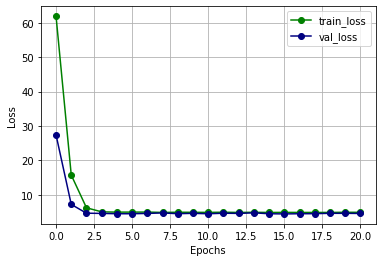

In [39]:
plt.plot(history_2.history['loss'], '-o', color = 'green', label = 'train_loss')
plt.plot(history_2.history['val_loss'], '-o', color = 'navy', label = 'val_loss')

plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [40]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[ 9.188733 ]
 [10.7362   ]
 [10.491534 ]
 [16.24336  ]
 [10.728228 ]
 [ 6.6742783]
 [ 8.863415 ]
 [ 9.232345 ]
 [ 9.685947 ]
 [ 9.35392  ]]


In [42]:
test_Y[:10]

array([[ 9.],
       [11.],
       [ 9.],
       [20.],
       [ 8.],
       [ 6.],
       [15.],
       [ 8.],
       [ 8.],
       [ 8.]])

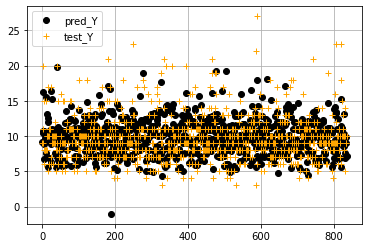

In [43]:
plt.plot(pred_Y[:], 'o', color = 'black', label = 'pred_Y')
plt.plot(test_Y[:], '+', color = 'orange', label = 'test_Y')

plt.grid()
plt.legend()

plt.show()

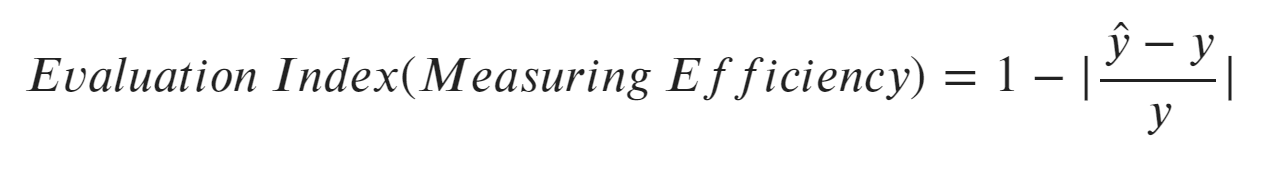

In [44]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y)/ test_Y))

print("GJ_NET_MODEL_V2 - ACC : {} %".format(np.round(acc * 100, 3)))

GJ_NET_MODEL_V2 - ACC : 82.486 %


결과 도출

- 신경망을 깊게 쌓는 것만이 정답은 아님
- 정규화를 해주는 것만이 정답은 아님